In [1]:
from collections import Counter, defaultdict
import pandas as pd
from seaborn import heatmap
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
vowels = 'aāoōuūiīeēə'
def get_sc(sym_1, sym_2):
    if sym_1==sym_2:
        return 0
    if sym_1==' ' or sym_2==' ':
        return float('inf')
    if ((sym_1 in vowels) + (sym_2 in vowels)) % 2 == 1 and ((sym_1 in approximats) + (sym_2 in approximats)) % 2 != 1:
        return 2
    return 1

In [3]:
def levd(target, pred):
    row_prev = [(0,(('Ø', 'Ø'),))]
    for char in pred:
        dist, changes = row_prev[-1][0] + 1, row_prev[-1][1] + (('Ø', char),)
        row_prev.append((dist, changes))
        
    for symbol in target:
        row_new = []
        for idx in range(len(pred) + 1):
            if idx == 0:
                dist, changes = row_prev[0][0] + 1, row_prev[0][1] + ((symbol, 'Ø'),)
                row_new.append((dist, changes))
            else:
                sub_cost = get_sc(symbol, pred[idx-1])
                sub, del_, ins = row_prev[idx-1][0] + sub_cost, row_prev[idx][0] + 1, row_new[idx-1][0] + 1
                
                min_ = min(sub, del_, ins)
                
                if sub == min_:
                    row_new.append((sub, row_prev[idx-1][1] + ((symbol, pred[idx-1]),)))
                elif del_ == min_:
                    row_new.append((del_, row_prev[idx][1] + ((symbol, 'Ø'),)))
                else:
                    row_new.append((ins, row_new[idx-1][1] + (('Ø', pred[idx-1]),)))
        row_prev = row_new
    return row_prev[-1][1][1:]

In [4]:
dct = Counter()
for _, row in pd.read_csv('C:/Users/Vito/Downloads/greedy.csv').iterrows():
    if pd.notna(row.transcription):
        dct.update(levd(row.text, row.transcription))

In [5]:
pd_dct = defaultdict(lambda: defaultdict(lambda: 0))
for (target, pred), count in dct.items():
    pd_dct[pred][target] += count

In [6]:
charset = list('Ø aābcčdḏḍḓeēəfgġhḥiīklmnoōprsšṣtṯṭuūwxyzžẓʕʔ') 
conf_matrix = pd.DataFrame(
                                pd_dct,
                                columns=charset,
                                index=charset
                            )
conf_matrix = conf_matrix.divide(conf_matrix.sum(axis=1), axis=0)

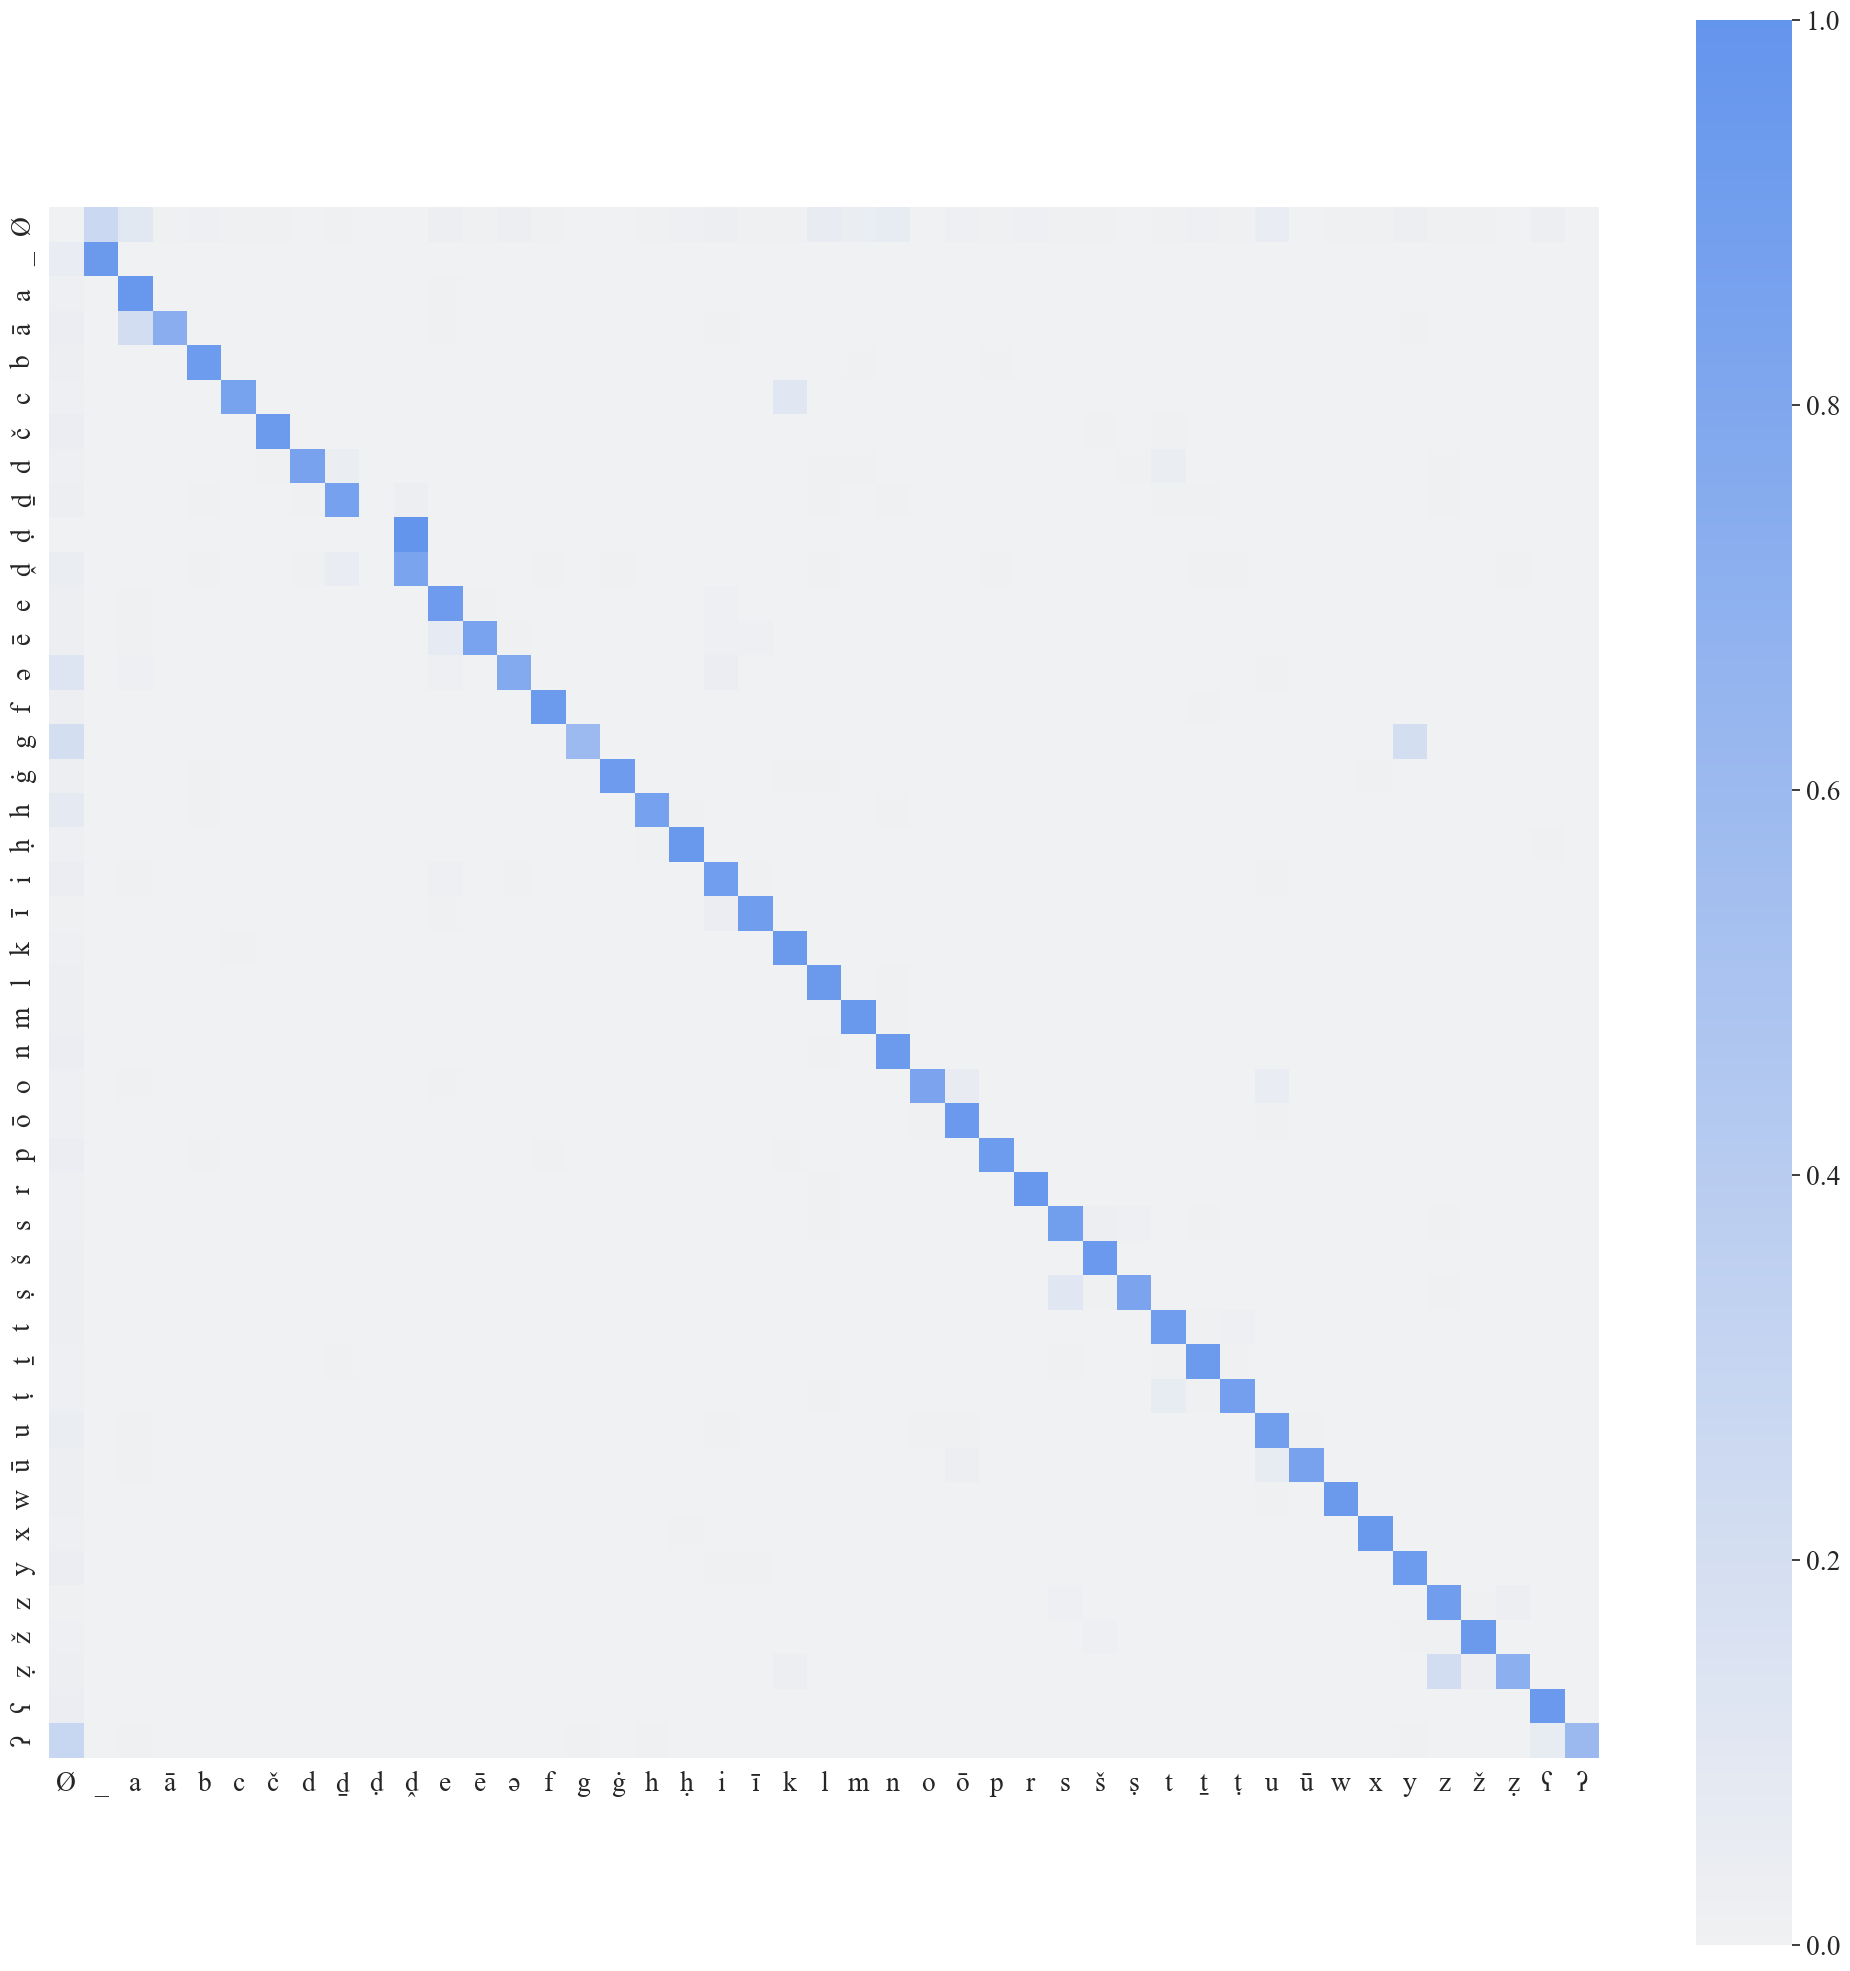

In [7]:
sns.set_theme(font="Times New Roman", font_scale=1.8)
fig = plt.figure(figsize=(25,25))
heatmap(
    conf_matrix.fillna(0).rename(columns={' ': '_'}, index={' ': '_'}), square=True, vmin=0, vmax=1, cmap=sns.color_palette("light:#6495ED", as_cmap=True),
       )
plt.savefig('1.png')